In [158]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [159]:
df = pd.read_csv("Loan_Data.csv")
df.drop("Loan_ID",axis=1,inplace= True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [160]:
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64'])

new_df = pd.DataFrame(non_numeric_cols)
new_df = pd.concat([non_numeric_cols, df['Credit_History']], axis=1)
new_order = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Credit_History','Loan_Status']
new_df = new_df.reindex(columns=new_order)
new_df.head()
        


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,Urban,1.0,Y
1,Male,Yes,1,Graduate,No,Rural,1.0,N
2,Male,Yes,0,Graduate,Yes,Urban,1.0,Y
3,Male,Yes,0,Not Graduate,No,Urban,1.0,Y
4,Male,No,0,Graduate,No,Urban,1.0,Y


In [161]:
new_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [162]:
if new_df.isnull().any().any():
    print("DataFrame contains null values")
else:
    print("DataFrame has no null values")

DataFrame contains null values


In [163]:
null_counts = new_df.isnull().sum()
print(null_counts)  

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Property_Area      0
Credit_History    50
Loan_Status        0
dtype: int64


In [164]:
for col in new_df.columns:
    new_df[col] = new_df[col].fillna(new_df[col].mode()[0])

In [165]:
#label encoding the varibales

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in new_df.columns:
    new_df[col] = le.fit_transform(new_df[col])

new_df.head()


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,Loan_Status
0,1,0,0,0,0,2,1,1
1,1,1,1,0,0,0,1,0
2,1,1,0,0,1,2,1,1
3,1,1,0,1,0,2,1,1
4,1,0,0,0,0,2,1,1


In [166]:
from sklearn.feature_selection import chi2

X = new_df.drop(columns="Loan_Status",axis=1)
Y = new_df["Loan_Status"]

In [167]:
# chi scores

chi_scores = chi2(X,Y)

chi_scores

(array([3.62343084e-02, 1.78242499e+00, 8.59527587e-02, 3.54050246e+00,
        7.28480330e-03, 3.77837464e-01, 2.60058772e+01]),
 array([8.49032435e-01, 1.81851834e-01, 7.69386856e-01, 5.98873168e-02,
        9.31982300e-01, 5.38762867e-01, 3.40379591e-07]))

# doing the P value sequence


<Axes: >

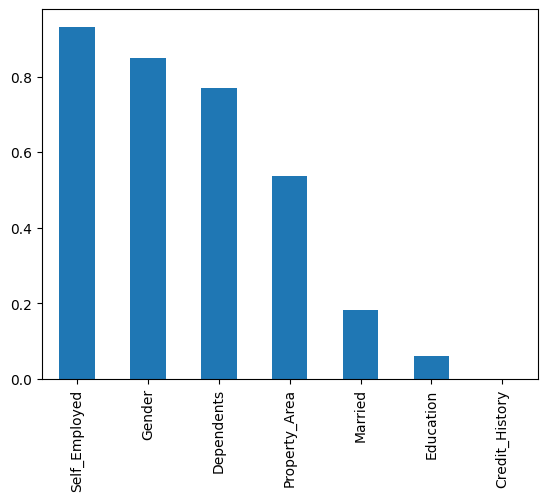

In [168]:
P_values = pd.Series(chi_scores[1],index = X.columns)
P_values.sort_values(ascending=False,inplace= True)
P_values.plot.bar()

# so whose evr values are greater than 0.5 are not importtant , the less ones are importtant

<Axes: >

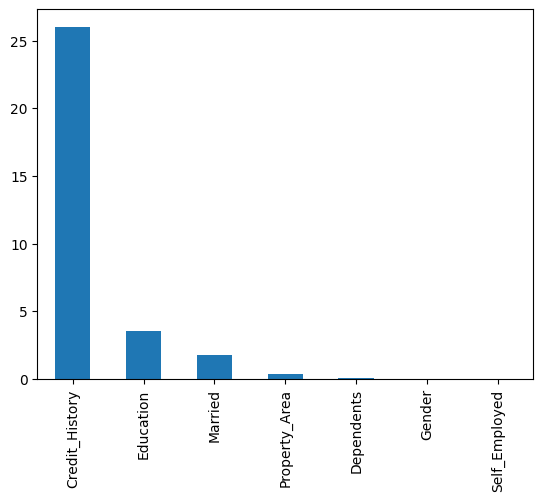

In [169]:
chi_scores = pd.Series(chi_scores[0],index = X.columns)
chi_scores.sort_values(ascending=False,inplace=True)

chi_scores.plot.bar()

In [170]:
from sklearn.feature_selection import SelectKBest

chi2_selector = SelectKBest(chi2,k='all')
chi2_selector.fit(X,Y)
chi2_scores = chi2_selector.scores_


feature_scores = pd.DataFrame({'Feature':X.columns,"chi2_scores":chi2_scores})
feature_scores= feature_scores.sort_values(ascending=False,by="chi2_scores")

print("Ranked Feature of the dataframe")
print("Higher the chi value higher the imprortance")
print(feature_scores)

Ranked Feature of the dataframe
Higher the chi value higher the imprortance
          Feature  chi2_scores
6  Credit_History    26.005877
3       Education     3.540502
1         Married     1.782425
5   Property_Area     0.377837
2      Dependents     0.085953
0          Gender     0.036234
4   Self_Employed     0.007285
